In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("train.csv")


<h1> EDA : </h1>

In [5]:
dataset.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<h2> Quelques faits stylisés : </h2>

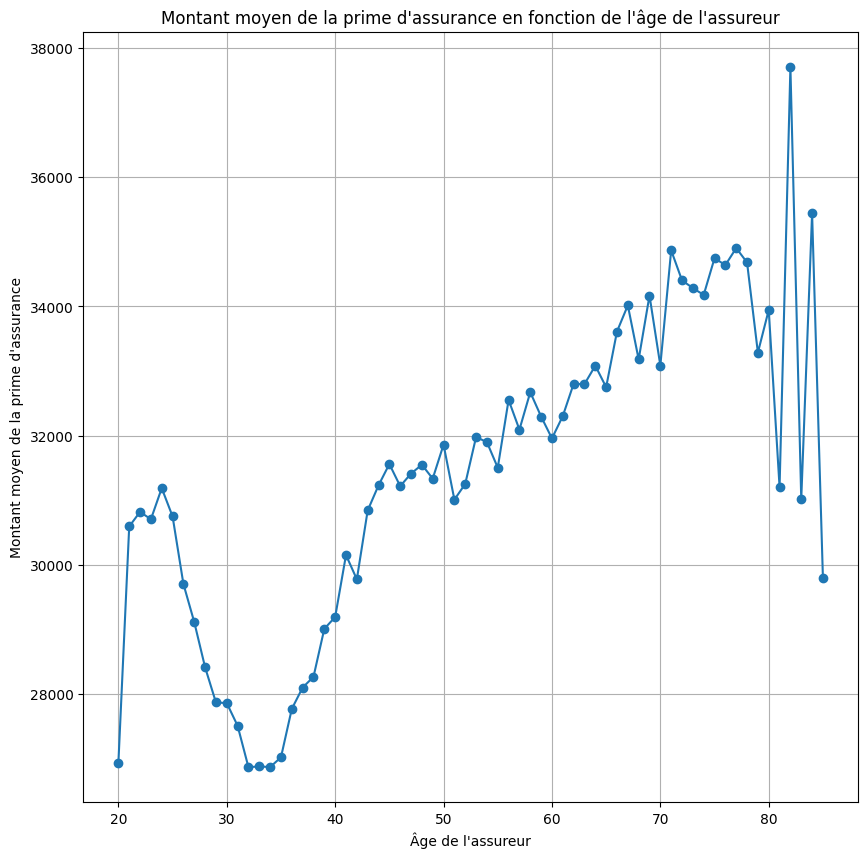

In [6]:
grouped_dataage = dataset.groupby('Age')['Annual_Premium'].mean()


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(grouped_dataage.index, grouped_dataage.values, marker='o', linestyle='-')
ax.set_ylabel('Montant moyen de la prime d\'assurance')
ax.set_title('Montant moyen de la prime d\'assurance en fonction de l\'âge de l\'assureur')
ax.set_xlabel('Âge de l\'assureur')
ax.grid(True)




<IPython.core.display.Javascript object>

C:\Users\samym\AppData\Local\Temp\ipykernel_26092\811095414.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data['Annual_Premium'], shade=True)


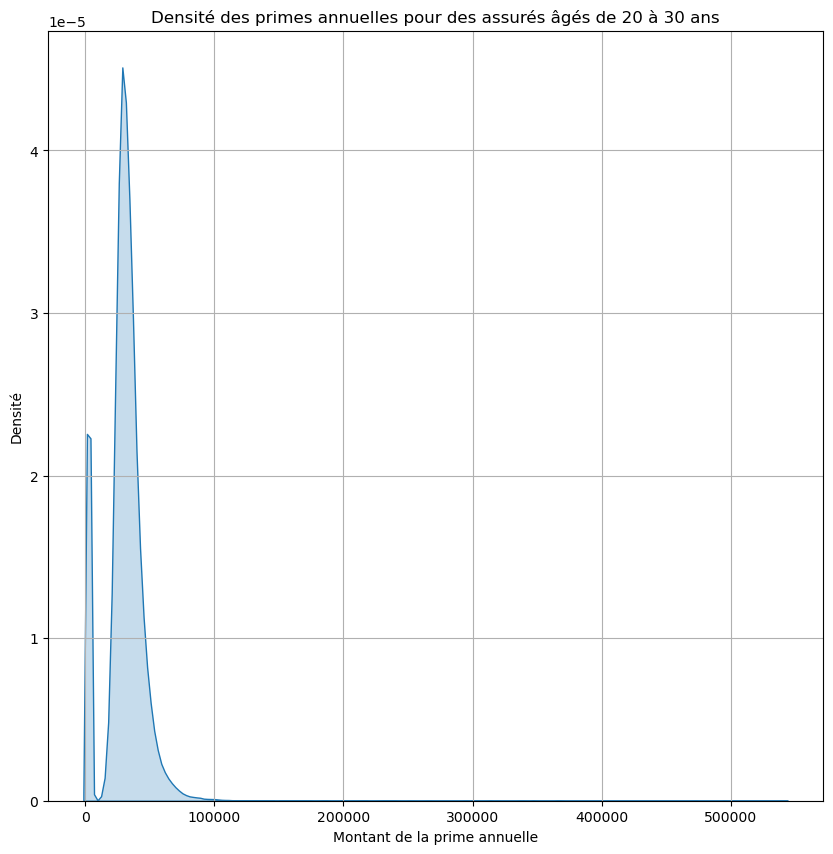

In [9]:
# Tracer la densité des primes annuelles


fig2,ax2=plt.subplots(1,1,figsize=(10,10))
filtered_data = dataset[(dataset['Age'] >= 20) & (dataset['Age'] <= 30)]

sns.kdeplot(filtered_data['Annual_Premium'], shade=True)
ax2.set_xlabel('Montant de la prime annuelle')
ax2.set_ylabel('Densité')
ax2.set_title('Densité des primes annuelles pour des assurés âgés de 20 à 30 ans')
ax2.grid(True)


<h3> Application d'un modèle de régression linéaire :  </h3>

<h3> Modèles pour le calcul de la prime de l'assuré </h3> ,
    "Notons $Y_{i}$ le montant de la prime pour l'assuré $i$. On va essayer de prédire cette variable en utilisant les différents covariates de notre modèle,
    "De part, l'EDA que nous avons effectuée, on va s'intéresser à certaines covariates qui vont permettre d'entraîner le modèle"
    
"On va supposer dans une première partie le modèle suivant:

$Y_{i}=\beta Age_{i} + epsilon_{i}$ avec $\mathbb{E}(\epsilon_{i}|Age_{i})=0$
De manière vectorielle, cela se réecrit,
\\

$Y=\beta Age + \epsilon $ avec $\mathbb{E}(\epsilon|Age)=0$ avec $Y \in R^{n}$
   

In [14]:
grouped_dataage

Age
20    26925.468549
21    30591.404448
22    30817.301183
23    30702.614899
24    31184.213367
          ...     
81    31201.571429
82    37705.379310
83    31012.727273
84    35440.818182
85    29792.363636
Name: Annual_Premium, Length: 66, dtype: float64

In [17]:
dataset[['Age']]

,Age
id,
1,44
2,76
3,47
4,21
5,29
...,...
381105,74
381106,30
381107,21


In [20]:
dataset["Age"].value_counts().index

Int64Index([24, 23, 22, 25, 21, 26, 27, 28, 43, 44, 45, 42, 46, 41, 29, 47, 40,
            48, 49, 39, 50, 30, 20, 51, 38, 52, 31, 37, 53, 36, 33, 32, 54, 35,
            34, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 68, 70,
            71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
           dtype='int64')

In [30]:
pd.DataFrame(grouped_dataage.index)

,Age
0,20
1,21
2,22
3,23
4,24
...,...
61,81
62,82
63,83
64,84


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
,# Charger votre DataFrame

#Séparer les variables covariables (X) et la variable à prédire (Annual_Premium)
X = pd.DataFrame(grouped_dataage.index)# Mettez le nom de votre colonne covariable

y = grouped_dataage.values  # Mettez le nom de votre colonne à prédire

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

#Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer la performance du modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
print("Coefficients du modèle:", model.coef_)
print("Terme d'interception:", model.intercept_)

2339.0922976462307
Coefficients du modèle: [103.29374161]
Terme d'interception: 26173.051157461985


In [32]:
r_squared = model.score(X_test, y_test)
print("Coefficient de détermination R²:", r_squared)

Coefficient de détermination R²: 0.41966319772880234


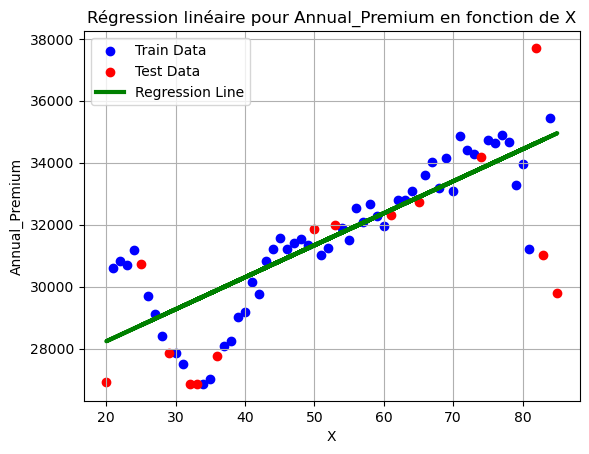

In [34]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Tracer la droite de régression
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')

plt.title('Régression linéaire pour Annual_Premium en fonction de X')
plt.xlabel('X')
plt.ylabel('Annual_Premium')
plt.legend()
plt.grid(True)
plt.show()